In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the dataset
data1 = pd.read_csv("Unemployment Rates by Education.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Degree Level       504 non-null    object 
 1   Nationality        504 non-null    object 
 2   Gender             504 non-null    object 
 3   Year Quarter       504 non-null    object 
 4   Unemployment Rate  504 non-null    float64
dtypes: float64(1), object(4)
memory usage: 19.8+ KB


In [3]:
data1.head(5)

,Degree Level,Nationality,Gender,Year Quarter,Unemployment Rate
0,Primary,NonSaudi,Female,2017 Q1,0.200
1,Primary,NonSaudi,Male,2017 Q1,0.300
2,Primary,Saudi,Female,2017 Q1,16.400
3,Primary,Saudi,Male,2017 Q1,7.900
4,Primary,NonSaudi,Female,2017 Q2,0.118


In [4]:
data1.tail(5)

,Degree Level,Nationality,Gender,Year Quarter,Unemployment Rate
499,Master,Saudi,Male,2021 Q1,1.111
500,Master,NonSaudi,Female,2021 Q2,24.215
501,Master,NonSaudi,Male,2021 Q2,0.911
502,Master,Saudi,Female,2021 Q2,9.633
503,Master,Saudi,Male,2021 Q2,1.715


In [5]:
data1.shape

(504, 5)

In [6]:
#Check for missing value in the dataset
data1.isnull().sum()

Degree Level         0
Nationality          0
Gender               0
Year Quarter         0
Unemployment Rate    0
dtype: int64

<Axes: >

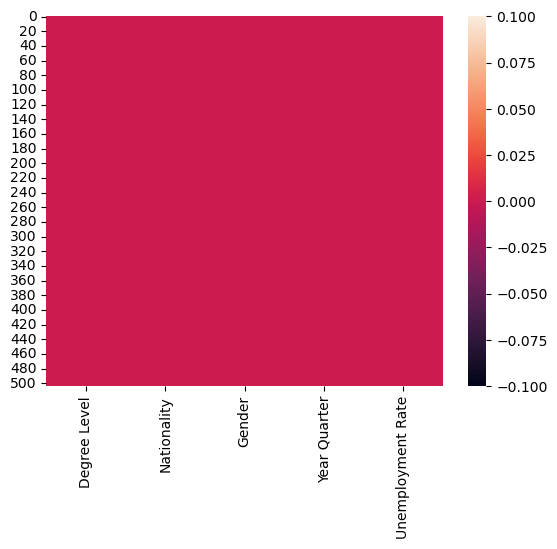

In [7]:
sns.heatmap(data1.isnull())

In [8]:
data1.shape

(504, 5)

In [9]:
data = data1.dropna()

In [10]:
data.isnull().sum()

Degree Level         0
Nationality          0
Gender               0
Year Quarter         0
Unemployment Rate    0
dtype: int64

In [11]:
#check for duplicate values in the dataset
print(f'There is {data.duplicated().sum()} duplicate value.')

There is 0 duplicate value.


In [12]:
#Check for nuniqiue values in the dataset
data.nunique()

Degree Level           7
Nationality            2
Gender                 2
Year Quarter          18
Unemployment Rate    447
dtype: int64

In [13]:
data.describe()

,Unemployment Rate
count,504.000000
mean,8.120942
std,10.395085
min,0.000000
25%,0.601500
50%,4.368500
75%,10.930750
max,51.643000


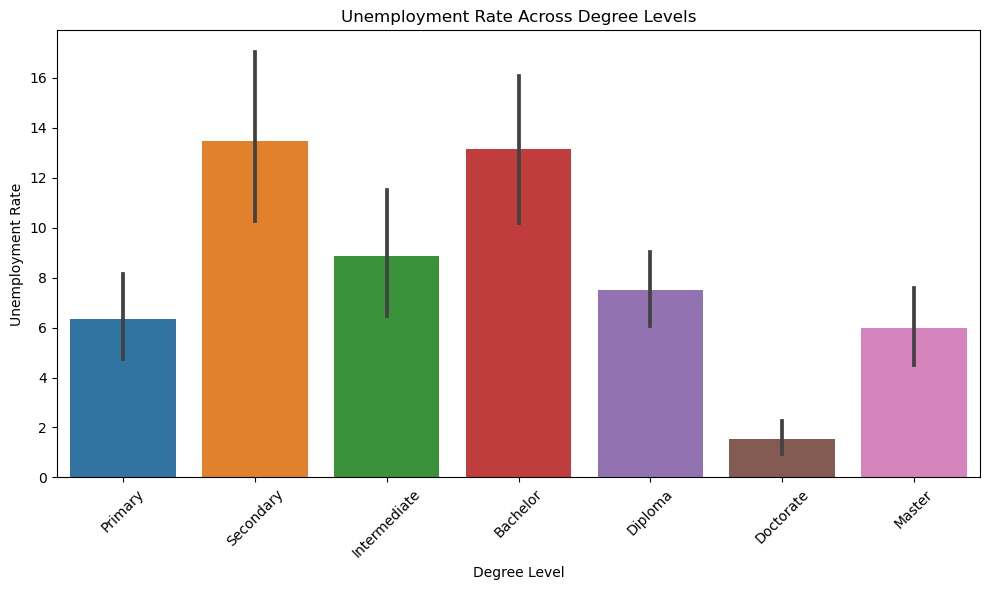

In [14]:
# Unemployment rate distribution in the year
plt.figure(figsize=(10, 6))
sns.barplot(x='Degree Level', y='Unemployment Rate', data=data)
plt.title('Unemployment Rate Across Degree Levels')
plt.xlabel('Degree Level')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

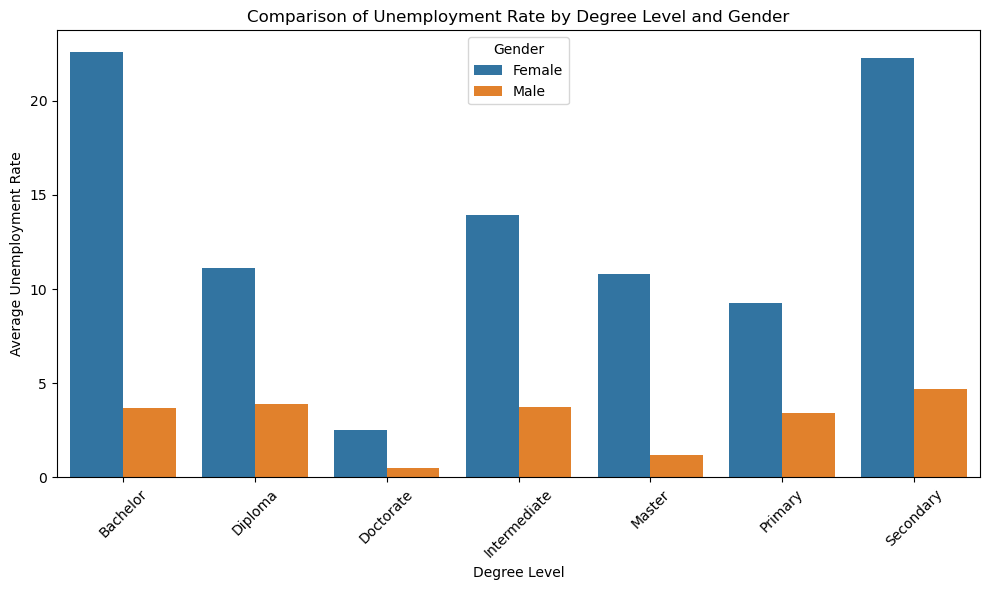

In [15]:
#Compare uneployment rates across gender and age groups
# Group data by both Degree Level and Gender, and calculate the average Unemployment Rate
grouped_data = data.groupby(['Degree Level', 'Gender'])['Unemployment Rate'].mean().reset_index()

# Plot grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Degree Level', y='Unemployment Rate', hue='Gender', data=grouped_data)
plt.title('Comparison of Unemployment Rate by Degree Level and Gender')
plt.xlabel('Degree Level')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

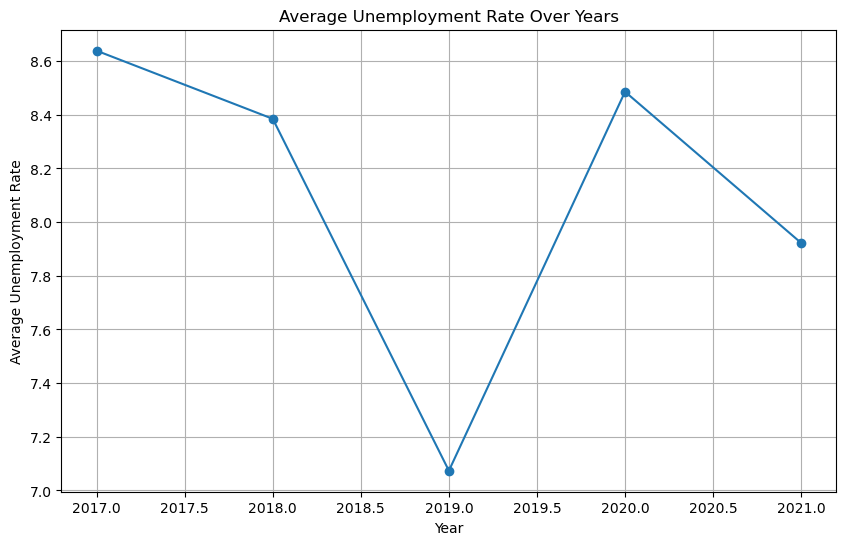

In [21]:
# Assuming 'data' is your DataFrame
# Split 'Year Quarter' to extract the year
data['Year'] = data['Year Quarter'].str.split(' ', expand=True)[0]

# Convert the 'Year' column to integer
data['Year'] = data['Year'].astype(int)

# Group by year and calculate the mean of 'Unemployment Rate' for each year
grouped_data = data.groupby('Year')['Unemployment Rate'].mean().reset_index()

# Plot the grouped data
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Year'], grouped_data['Unemployment Rate'], marker='o', linestyle='-')
# Adding title and labels
plt.title('Average Unemployment Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate')
plt.grid(True)
plt.show()


In [20]:
#Select the independent and dependent attributes to apply algorithm
# Independent variables (X)
X = data[['Degree Level']]

# Dependent variable (y)
y = data['Unemployment Rate']

In [21]:
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
X['Degree Level'] = label_encoder.fit_transform(X['Degree Level'])

# Display the transformed data
print(X.head())


   Degree Level  Nationality  Gender  Year Quarter
0             5            0       0             0
1             5            0       1             0
2             5            1       0             0
3             5            1       1             0
4             5            0       0             1


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train)

     Degree Level  Nationality  Gender  Year Quarter
75              6            1       1             0
442             4            1       0             2
15              5            1       1             3
325             1            0       1             9
388             2            0       0             7
..            ...          ...     ...           ...
106             6            1       0             8
270             0            1       0            13
348             1            0       0            15
435             4            1       1             0
102             6            1       0             7

[403 rows x 4 columns]


In [23]:
print(X_test)

     Degree Level  Nationality  Gender  Year Quarter
173             3            0       1             7
274             0            1       0            14
489             4            0       1            14
72              6            0       0             0
305             1            0       1             4
..            ...          ...     ...           ...
331             1            1       1            10
411             2            1       1            12
502             4            1       0            17
349             1            0       1            15
86              6            1       0             3

[101 rows x 4 columns]


In [25]:
print(y_test)

173     0.244
274    34.761
489     0.712
72      4.000
305     0.653
        ...  
331     6.233
411     0.000
502     9.633
349     0.449
86     38.869
Name: Unemployment Rate, Length: 101, dtype: float64


In [26]:
print(y_train)

75      8.800
442    15.690
15      8.507
325     0.074
388     1.299
        ...  
106    42.821
270    36.835
348    23.076
435     1.300
102    42.557
Name: Unemployment Rate, Length: 403, dtype: float64


In [27]:
def get_dict_metrics(y_train, y_train_predict, y_test, y_test_predict):
    dict_metrics = {
        'MAE score Train' : round(metrics.mean_absolute_error(y_train, y_train_predict), 2),
        'MAE score Test' : round(metrics.mean_absolute_error(y_test, y_test_predict), 2),
        'RMSE score Train' : round(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)), 2),
        'RMSE score Test' : round(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)), 2),
        'R^2 score Train' : round(metrics.r2_score(y_train, y_train_predict), 2),
        'R^2 score Test' : round(metrics.r2_score(y_test, y_test_predict), 2)
    }
    return dict_metrics
        
        

In [28]:
import sklearn.tree as tree

In [29]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3, random_state=200)

# Fit the model
regressor.fit(X_train, y_train)

# Predict on the test set
predictions = regressor.predict(X_test)

# Evaluate the model
score = regressor.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.6872182307772212


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the LinearRegression model
regressor = LinearRegression()

# Fit the model
regressor.fit(X_train, y_train)

# Predict on the test set
predictions = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 69.28382483650539


In [31]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Adjust the maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Adjust the minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Adjust the minimum samples required to be at a leaf node
}

# Instantiate the GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=200), param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best hyperparameters to train the model
regressor = DecisionTreeRegressor(random_state=200, **best_params)
regressor.fit(X_train, y_train)

# Predict on the test set
predictions = regressor.predict(X_test)

# Evaluate the model
score = regressor.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.9012847783616349


<function matplotlib.pyplot.show(close=None, block=None)>

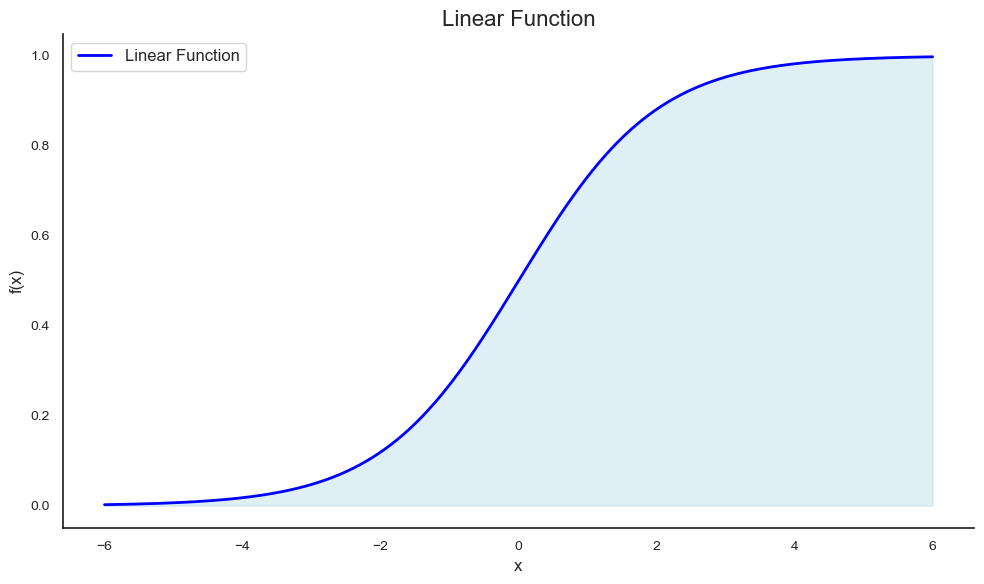

In [32]:
def linear_function(X):
    return 1 / (1+ np.exp(-X))

#Generate x values
X_values = np.linspace(-6, 6, 400)

#Calc corr y values using the log func
y_values = linear_function(X_values)

sns.set(style="white")

plt.figure(figsize = (10, 6))

plt.plot(X_values, y_values, label ="Linear Function", color = "blue", linewidth = 2)

#add labels and title
plt.title("Linear Function", fontsize=16)
plt.xlabel('x', fontsize = 12)
plt.ylabel('f(x)', fontsize = 12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(fontsize=12) #add a legend

plt.fill_between(X_values, y_values, color='lightblue', alpha=0.4)

#set background color to white
cl = plt.gca()
cl.set_facecolor('white')

sns.despine()

plt.tight_layout()
plt.show

In [38]:
import pickle
with open('model','wb') as f:   
    pickle.dump(regressor, f)